# Build MI Network from types and samples

## Libs

In [ ]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'

## Check datas

Check for which dests we have combined embeds, and just the query objects

In [10]:
backup_h5ds = os.listdir(backup_dir)
latent_h5ds = list(compress(backup_h5ds,['latent' in h5d for h5d in backup_h5ds]))
query_h5ds = list(compress(backup_h5ds,['query' in h5d for h5d in backup_h5ds]))
combined_h5ds = list(compress(backup_h5ds,['combined' in h5d for h5d in backup_h5ds]))

In [61]:
print(len(combined_h5ds))
combined_h5ds

20


['combined_Wu.h5ad',
 'combined_Zilionis.h5ad',
 'combined_Adams.h5ad',
 'combined_UKIM-V-2.h5ad',
 'combined_Maynard.h5ad',
 'combined_Madissoon.h5ad',
 'combined_Lambrechts.h5ad',
 'combined_Travaglini.h5ad',
 'combined_Emilio.h5ad',
 'combined_Leader.h5ad',
 'combined_Lambrechts_2018_LUAD_6149v2.h5ad',
 'combined_He.h5ad',
 'combined_Habermann.h5ad',
 'combined_Mayr.h5ad',
 'combined_Reyfman.h5ad',
 'combined_Chen.h5ad',
 'combined_UKIM-V.h5ad',
 'combined_Goveia.h5ad',
 'combined_Kim.h5ad',
 'combined_Laughney.h5ad']

In [ ]:
query_h5ds

['query_Leader.h5ad',
 'query_Laughney.h5ad',
 'query_Lambrechts_2018_LUAD_6149v1.h5ad',
 'query_Lambrechts_2018_LUAD_6653.h5ad',
 'query_Reyfman.h5ad',
 'query_emb_Leader.h5ad',
 'query_Adams.h5ad',
 'query_Habermann.h5ad',
 'query_Goveia.h5ad',
 'query_UKIM-V.h5ad',
 'query_He.h5ad',
 'query_Lambrechts_2018_LUAD_6149v2.h5ad',
 'query_Madissoon.h5ad',
 'query_Travaglini.h5ad',
 'query_Chen.h5ad',
 'query_Mayr.h5ad',
 'query_Maynard.h5ad',
 'query_Zilionis.h5ad',
 'query_Kim.h5ad',
 'query_Wu.h5ad',
 'query_Emilio.h5ad']

In [ ]:
latent_h5ds

['latent_Lambrechts_2018_LUAD_6149v2.h5ad',
 'latent_Chen_Zhang_2020_NSCLC.h5ad',
 'latent_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad',
 'latent_Emilio.h5ad',
 'latent_UKIM-V-2.h5ad',
 'latent_Travaglini_Krasnow_2020_Lung_10x.h5ad',
 'latent_Maynard_Bivona_2020_NSCLC.h5ad',
 'latent_Leader_Merad_2021_10x_3p_v1_sort.h5ad',
 'latent_Wu_Zhou_2021_NSCLC.h5ad',
 'latent_Goveia_Carmeliet_2020_NSCLC.h5ad',
 'latent_Lambrechts_2018_LUAD_6149v1.h5ad',
 'latent_Laughney_Massague_2020_NSCLC.h5ad',
 'latent_Zilionis_Klein_2019_NSCLC.h5ad',
 'latent_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad',
 'latent_Lambrechts_2018_LUAD_6653.h5ad',
 'latent_UKIM-V.h5ad']

## Get missing combined h5ds

In [15]:
dsets = pd.read_csv('samplesheet_scrnaseq_preprocessing.csv')
dsets2 = pd.read_csv('samplesheet_scrnaseq_preprocessing2.csv')

In [16]:
dsets = dsets.rename(columns={'no_cancer': 'no_cancer_or_filter'})

In [17]:
dsets2.loc[dsets2.id == 'UKIM-V-2', 'no_cancer_or_filter'] = False

/tmp/ipykernel_50763/762601001.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dsets2.loc[dsets2.id == 'UKIM-V-2', 'no_cancer_or_filter'] = False


Mark the dsets for which we have combined embeds

We make a table of the names we have h5ad for and add a column to the data to do join

In [18]:
dsets.shape

(22, 12)

In [19]:
dsets = pd.concat([dsets, dsets2], axis=0)

In [20]:
names = [h5d[:-5].split('_')[1] for h5d in combined_h5ds]
names = pd.DataFrame({'Names':names})
names['Annots'] = True


dsets['Names'] = [h5d.split('_')[0] for h5d in dsets.id]

dsets = pd.merge(dsets, names, how='left', on='Names')
dsets.Annots = dsets.Annots.fillna(False)

Check if there are some datasets not annotated, to go annotate them

In [52]:
dsets.query('no_cancer_or_filter == False & Annots == False')

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots


Reduce to just cancer biopsies

In [13]:
dsets = dsets.query('no_cancer_or_filter == False')

Append the dois to have in one place

In [15]:
dois = pd.read_csv('study_dois.csv')
dois['Names'] = [doi.split('_')[0] for doi in dois.study ]
dsets = pd.merge(dsets, dois, how='left', on='Names')
dsets

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots,study,doi
0,Chen_Zhang_2020_NSCLC,data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Chen,True,Chen_Zhang_2020,10.1186/s13059-020-02064-6
1,Goveia_Carmeliet_2020_NSCLC,data/12_input_adatas/goveia_carmeliet_2020_nsc...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Goveia,True,Goveia_Carmeliet_2020,10.1016/j.ccell.2019.12.001
2,Kim_Lee_2020_LUAD,data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad,1000,35000,300,10000,20,sample,True,False,10x-3'-v2,GRCh8,Kim,True,Kim_Lee_2020,10.1038/s41467-020-16164-1
3,He_Fan_2021_LUAD,data/12_input_adatas/He_Fan_2021_LUAD.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8?,He,True,He_Fan_2021,10.1038/s41388-020-01528-0
4,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
5,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
6,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
7,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
8,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
9,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5


In [33]:
dsets = pd.read_csv('dsets.csv')
# dsets.to_csv('dsets.csv')
dsets

,Unnamed: 0,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots,study,doi
0,0,Chen_Zhang_2020_NSCLC,data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Chen,True,Chen_Zhang_2020,10.1186/s13059-020-02064-6
1,1,Goveia_Carmeliet_2020_NSCLC,data/12_input_adatas/goveia_carmeliet_2020_nsc...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Goveia,True,Goveia_Carmeliet_2020,10.1016/j.ccell.2019.12.001
2,2,Kim_Lee_2020_LUAD,data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad,1000,35000,300,10000,20,sample,True,False,10x-3'-v2,GRCh8,Kim,True,Kim_Lee_2020,10.1038/s41467-020-16164-1
3,3,He_Fan_2021_LUAD,data/12_input_adatas/He_Fan_2021_LUAD.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8?,He,True,He_Fan_2021,10.1038/s41388-020-01528-0
4,4,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
5,5,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
6,6,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
7,7,Laughney_Massague_2020_NSCLC,data/12_input_adatas/laughney_massague_2020_ns...,1800,40000,500,10000,20,sample,True,False,10x-3'-v2,GRCh8,Laughney,True,Laughney_Massague_2020,10.1038/s41591-019-0750-6
8,8,Maynard_Bivona_2020_NSCLC,data/12_input_adatas/maynard2020.h5ad,20000,20000000,600,20000,30,sample,False,False,NaN,NaN,Maynard,True,Maynard_Bivona_2020,10.1016/j.cell.2020.07.017
9,9,UKIM-V,data/12_input_adatas/batch1_3patients.h5ad,2000,100000,200,8000,30,sample,True,False,NaN,NaN,UKIM-V,True,UKIM-V,10.1101/2022.05.09.491204


### Renamer

In [30]:
for file_name in query_h5ds:
    if 'Lambr' in file_name:
        continue
    if '_emb_' in file_name:
        continue
    
        
    name = file_name[:-5].split('_')[1]
    print(name)
    id_ = dsets.id[dsets.Names == name].values
    
    if id_.size == 0:
        continue
    id_ = id_[0]
    new_name = f'query_{id_}.h5ad'
    
    os.rename(f'{backup_dir}{file_name}', f'{backup_dir}{new_name}')

Leader
query_Leader_Merad_2021_10x_3p_v1_sort.h5ad
Laughney
query_Laughney_Massague_2020_NSCLC.h5ad
Reyfman
query_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad
Adams
query_Adams_Kaminski_2020_COPD.h5ad
Habermann
query_Habermann_Kropski_2020_pulmonary-fibrosis.h5ad
Goveia
query_Goveia_Carmeliet_2020_NSCLC.h5ad
UKIM-V
query_UKIM-V.h5ad
He
query_He_Fan_2021_LUAD.h5ad
Madissoon
query_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad
Travaglini
query_Travaglini_Krasnow_2020_Lung_10x.h5ad
Chen
query_Chen_Zhang_2020_NSCLC.h5ad
Mayr
query_Mayr_Schiller_2020_pulmonary-fibrosis.h5ad
Maynard
query_Maynard_Bivona_2020_NSCLC.h5ad
Zilionis
query_Zilionis_Klein_2019_NSCLC.h5ad
Kim
query_Kim_Lee_2020_LUAD.h5ad
Wu
query_Wu_Zhou_2021_NSCLC.h5ad
Emilio


### Renamer

In [30]:
for file_name in query_h5ds:
    if 'Lambr' in file_name:
        continue
    if '_emb_' in file_name:
        continue
    
        
    name = file_name[:-5].split('_')[1]
    print(name)
    id_ = dsets.id[dsets.Names == name].values
    
    if id_.size == 0:
        continue
    id_ = id_[0]
    new_name = f'query_{id_}.h5ad'
    
    os.rename(f'{backup_dir}{file_name}', f'{backup_dir}{new_name}')

Leader
query_Leader_Merad_2021_10x_3p_v1_sort.h5ad
Laughney
query_Laughney_Massague_2020_NSCLC.h5ad
Reyfman
query_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad
Adams
query_Adams_Kaminski_2020_COPD.h5ad
Habermann
query_Habermann_Kropski_2020_pulmonary-fibrosis.h5ad
Goveia
query_Goveia_Carmeliet_2020_NSCLC.h5ad
UKIM-V
query_UKIM-V.h5ad
He
query_He_Fan_2021_LUAD.h5ad
Madissoon
query_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad
Travaglini
query_Travaglini_Krasnow_2020_Lung_10x.h5ad
Chen
query_Chen_Zhang_2020_NSCLC.h5ad
Mayr
query_Mayr_Schiller_2020_pulmonary-fibrosis.h5ad
Maynard
query_Maynard_Bivona_2020_NSCLC.h5ad
Zilionis
query_Zilionis_Klein_2019_NSCLC.h5ad
Kim
query_Kim_Lee_2020_LUAD.h5ad
Wu
query_Wu_Zhou_2021_NSCLC.h5ad
Emilio


### For presentation:

We guess chemistry and fill one doi

In [28]:
dsets_pres.loc[9:12, 'chem' ]

9     NaN
10    NaN
11    NaN
12    NaN
Name: chem, dtype: object

In [34]:
dsets_pres = dsets.loc[:, ['id','chem', 'assembly', 'doi']]
dsets_pres.loc[6, 'chem' ] = "10x-3'-v2"
dsets_pres.loc[9:12, 'chem' ] = "10x-3'-v2"
dsets_pres.loc[7:8, 'chem' ] = "Smart-Seq-v2"

dsets_pres.loc[5:12, 'assembly' ] = "GRCh8"

dsets_pres.loc[12, 'doi' ] = "10.1016/j.ccell.2022.10.008"

In [35]:
dsets_pres

,id,chem,assembly,doi
0,Chen_Zhang_2020_NSCLC,10x-3'-v2,GRCh8,10.1186/s13059-020-02064-6
1,Goveia_Carmeliet_2020_NSCLC,10x-3'-v2,GRCh8,10.1016/j.ccell.2019.12.001
2,Kim_Lee_2020_LUAD,10x-3'-v2,GRCh8,10.1038/s41467-020-16164-1
3,He_Fan_2021_LUAD,10x-3'-v2,GRCh8?,10.1038/s41388-020-01528-0
4,Lambrechts_2018_LUAD_6149v1,10x-3'-v1,hg19,10.1038/s41591-018-0096-5
5,Lambrechts_2018_LUAD_6149v2,10x-3'-v2,GRCh8,10.1038/s41591-018-0096-5
6,Lambrechts_2018_LUAD_6653,10x-3'-v2,GRCh8,10.1038/s41591-018-0096-5
7,Laughney_Massague_2020_NSCLC,Smart-Seq-v2,GRCh8,10.1038/s41591-019-0750-6
8,Maynard_Bivona_2020_NSCLC,Smart-Seq-v2,GRCh8,10.1016/j.cell.2020.07.017
9,UKIM-V,10x-3'-v2,GRCh8,10.1101/2022.05.09.491204


## Import h5ds

These would be the keys of interest for the matrix

In [15]:
chen.obs['Level_5_transfered_label'].cat.categories

NameError: name 'chen' is not defined

In [23]:
chen_name = [el for el in combined_h5ds if 'hen' in el][0]
chen = sc.read_h5ad(f'{backup_dir}{chen_name}')
chen = chen[chen.obs['ref_or_query']=='query']
chen.obs_keys

<bound method AnnData.obs_keys of View of AnnData object with n_obs × n_vars = 131287 × 30
    obs: 'sample', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', 'single_cell_platform', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entropy_subject_ID_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clea

In [24]:
print(chen.obs['sample'].astype('category'))
chen.obs['condition'].astype('category')

AAACCCAAGAGCCATG-1_0     NSCLC-10
AAACCCAAGATTAGAC-1_0     NSCLC-10
AAACCCAAGGTCGCCT-1_0     NSCLC-10
AAACCCAAGTCATTGC-1_0     NSCLC-10
AAACCCACACGGATCC-1_0     NSCLC-10
                           ...   
TTTGTCATCTCCAACC-1_10     NSCLC-5
TTTGTCATCTGAGTGT-1_10     NSCLC-5
TTTGTCATCTGATACG-1_10     NSCLC-5
TTTGTCATCTGCAAGT-1_10     NSCLC-5
TTTGTCATCTTGTCAT-1_10     NSCLC-5
Name: sample, Length: 131287, dtype: category
Categories (11, object): ['NSCLC-1', 'NSCLC-2', 'NSCLC-3', 'NSCLC-4', ..., 'NSCLC-8', 'NSCLC-9', 'NSCLC-10', 'NSCLC-11']


AAACCCAAGAGCCATG-1_0     NSCLC
AAACCCAAGATTAGAC-1_0     NSCLC
AAACCCAAGGTCGCCT-1_0     NSCLC
AAACCCAAGTCATTGC-1_0     NSCLC
AAACCCACACGGATCC-1_0     NSCLC
                         ...  
TTTGTCATCTCCAACC-1_10    NSCLC
TTTGTCATCTGAGTGT-1_10    NSCLC
TTTGTCATCTGATACG-1_10    NSCLC
TTTGTCATCTGCAAGT-1_10    NSCLC
TTTGTCATCTTGTCAT-1_10    NSCLC
Name: condition, Length: 131287, dtype: category
Categories (1, object): ['NSCLC']

In [25]:
chen.obs['tissue']

AAACCCAAGAGCCATG-1_0     lung
AAACCCAAGATTAGAC-1_0     lung
AAACCCAAGGTCGCCT-1_0     lung
AAACCCAAGTCATTGC-1_0     lung
AAACCCACACGGATCC-1_0     lung
                         ... 
TTTGTCATCTCCAACC-1_10    lung
TTTGTCATCTGAGTGT-1_10    lung
TTTGTCATCTGATACG-1_10    lung
TTTGTCATCTGCAAGT-1_10    lung
TTTGTCATCTTGTCAT-1_10    lung
Name: tissue, Length: 131287, dtype: category
Categories (1, object): ['lung']

In [37]:
chen.obs['origin']

AAACCCAAGAGCCATG-1_0     tumor_primary
AAACCCAAGATTAGAC-1_0     tumor_primary
AAACCCAAGGTCGCCT-1_0     tumor_primary
AAACCCAAGTCATTGC-1_0     tumor_primary
AAACCCACACGGATCC-1_0     tumor_primary
                             ...      
TTTGTCATCTCCAACC-1_10    tumor_primary
TTTGTCATCTGAGTGT-1_10    tumor_primary
TTTGTCATCTGATACG-1_10    tumor_primary
TTTGTCATCTGCAAGT-1_10    tumor_primary
TTTGTCATCTTGTCAT-1_10    tumor_primary
Name: origin, Length: 131287, dtype: category
Categories (1, object): ['tumor_primary']

Save all AnnDatas into a dict, and check that they have annotations

In [34]:
adatas = {}

for id_ in dsets.id:
    name = dsets.Names[dsets.id == id_]
    adata = sc.read_h5ad(f'{backup_dir}combined_{id_}.h5ad')
    print(name)
    assert len([element for element in adata.obs_keys() if 'Level' in element] ) > 0
    adata = adata[adata.obs['ref_or_query']=='query']
    
    adatas[id_] = adata

0    Chen
Name: Names, dtype: object
1    Goveia
Name: Names, dtype: object
2    Kim
Name: Names, dtype: object
3    He
Name: Names, dtype: object
4    Lambrechts
Name: Names, dtype: object
5    Lambrechts
Name: Names, dtype: object
6    Lambrechts
Name: Names, dtype: object
7    Laughney
Name: Names, dtype: object
8    Maynard
Name: Names, dtype: object
9    UKIM-V
Name: Names, dtype: object
10    Wu
Name: Names, dtype: object
11    Zilionis
Name: Names, dtype: object
12    UKIM-V-2
Name: Names, dtype: object


In [35]:
adatas['Laughney_Massague_2020_NSCLC']

View of AnnData object with n_obs × n_vars = 29690 × 30
    obs: 'sample', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', 'single_cell_platform', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entropy_subject_ID_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_original_ann_

## Groupings

In [85]:
group_before = None
groups = None

for name, adata in adatas.items():
    print(name)
    group = adata.obs.groupby(['Level_2_transfered_label', 'sample']).size()
    sample_inds = [sample for sample in group.index.get_level_values('sample')]
    group.index = group.index.set_levels([f'{sample}_{name}' for sample in sample_inds],
                                 level=1, verify_integrity=False)
    
    group_before = group
    if group_before is None:
        groups = group
    else:
        groups = pd.concat([group_before, groups])
        
groups

Chen_Zhang_2020_NSCLC
Goveia_Carmeliet_2020_NSCLC
Kim_Lee_2020_LUAD
He_Fan_2021_LUAD
Lambrechts_2018_LUAD_6149v1
Lambrechts_2018_LUAD_6149v2
Lambrechts_2018_LUAD_6653
Laughney_Massague_2020_NSCLC
Maynard_Bivona_2020_NSCLC
UKIM-V
Wu_Zhou_2021_NSCLC
Zilionis_Klein_2019_NSCLC
UKIM-V-2


Level_2_transfered_label  sample                        
Airway epithelium         P4_normal_adjacent_UKIM-V-2         56
                          P4_tumor_primary_UKIM-V-2           20
                          P5_normal_adjacent_UKIM-V-2         57
                          P5_tumor_primary_UKIM-V-2           35
                          P6_normal_adjacent_UKIM-V-2         27
                                                            ... 
Unknown                   NSCLC-7_Chen_Zhang_2020_NSCLC      596
                          NSCLC-8_Chen_Zhang_2020_NSCLC     2384
                          NSCLC-9_Chen_Zhang_2020_NSCLC      997
                          NSCLC-10_Chen_Zhang_2020_NSCLC    1459
                          NSCLC-11_Chen_Zhang_2020_NSCLC    2874
Length: 2940, dtype: int64

### Start from here

In [ ]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
backup_h5ds = os.listdir(backup_dir)

In [86]:
groups.to_csv('groups.csv')
# groups = pd.read_csv('groups.csv')

### Samples by type

In [87]:
groups

Level_2_transfered_label  sample                        
Airway epithelium         P4_normal_adjacent_UKIM-V-2         56
                          P4_tumor_primary_UKIM-V-2           20
                          P5_normal_adjacent_UKIM-V-2         57
                          P5_tumor_primary_UKIM-V-2           35
                          P6_normal_adjacent_UKIM-V-2         27
                                                            ... 
Unknown                   NSCLC-7_Chen_Zhang_2020_NSCLC      596
                          NSCLC-8_Chen_Zhang_2020_NSCLC     2384
                          NSCLC-9_Chen_Zhang_2020_NSCLC      997
                          NSCLC-10_Chen_Zhang_2020_NSCLC    1459
                          NSCLC-11_Chen_Zhang_2020_NSCLC    2874
Length: 2940, dtype: int64

Check the distribution of nans across samples. And locate the
study that has the most nans: It is Maier

In [88]:
naners = groups.unstack().isnull()
count_nans = []
much_nans = []

for col in naners.columns:
    counter = sum(naners[col])
    if counter > 6:
        much_nans.append(col)
    count_nans.append(counter)

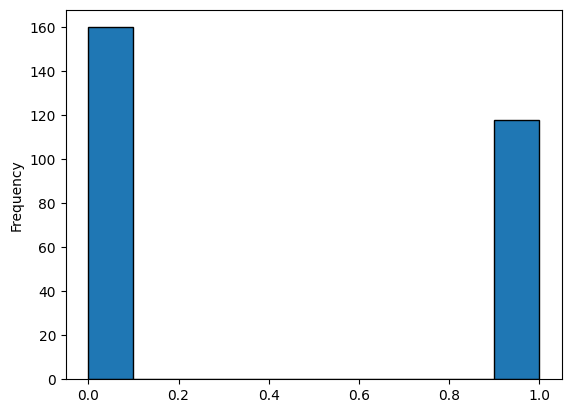

In [89]:
import matplotlib.pyplot as plt
data_series = pd.Series(count_nans)
data_series.plot(kind='hist', edgecolor='black')

plt.show()

Make a cutoff for only samples that have more than 1 cell of the type.

In [90]:
cutoff = pd.DataFrame(groups[groups > 1])
cutoff.groupby('Level_2_transfered_label').size()

Level_2_transfered_label
Airway epithelium      246
Alveolar epithelium    217
Blood vessels          206
Fibroblast lineage     223
Lymphatic EC           108
Lymphoid               272
Mesothelium             28
Myeloid                272
Smooth muscle          140
Submucosal Gland         4
Unknown                267
dtype: int64

### Cells by type

In [91]:
cutoff.groupby('Level_2_transfered_label').sum()

,0
Level_2_transfered_label,
Airway epithelium,90528
Alveolar epithelium,43884
Blood vessels,38708
Fibroblast lineage,15410
Lymphatic EC,4216
Lymphoid,388008
Mesothelium,402
Myeloid,265640
Smooth muscle,1664


### Total cells:

In [92]:
cutoff.groupby('Level_2_transfered_label').sum().sum()

0    902813
dtype: int64

## Matrix of Samples by type

Now to get the mutual information we need to have a matrix where 
we can get the pointwise mutual information (relative entropy) of any
two cell types 
$$
\log{\frac{p(x,y)}{p(x)p(y)}}
$$.
To then get the expected value of those:
$$
\sum_{X,Y}{p(x,y)\log{\frac{p(x,y)}{p(x)p(y)}}}
$$.

The idea was to get a discrete mutual information, because we are getting counts of cells being present in the tisse to study.
Nevertheless, a discrete mutual information would just be constraining the states to present or not present, or some
discrete states that would nevertheless be ordered and so the ranking the aracne does suddenly seems the same.

Definitely just having present or not present would give us no info because at this level the clusters almost always have at least one cell.

In [93]:
samp_type = groups.unstack().transpose()
samp_type

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Submucosal Gland,Unknown
sample,,,,,,,,,,,
1247_Lambrechts_2018_LUAD_6149v1,2.0,70.0,31.0,11.0,0.0,122.0,1.0,105.0,0.0,NaN,1.0
BRONCHO_11_Kim_Lee_2020_LUAD,99.0,2.0,2.0,3.0,3.0,2222.0,0.0,733.0,0.0,0.0,78.0
BRONCHO_58_Kim_Lee_2020_LUAD,28.0,309.0,12.0,63.0,1.0,1693.0,0.0,509.0,11.0,0.0,70.0
BT1249_Lambrechts_2018_LUAD_6149v1,12.0,0.0,0.0,38.0,0.0,24.0,0.0,30.0,2.0,NaN,6.0
BT1290_Lambrechts_2018_LUAD_6149v2,67.0,284.0,158.0,184.0,5.0,1781.0,0.0,1090.0,20.0,NaN,169.0
...,...,...,...,...,...,...,...,...,...,...,...
scrBT1428_hg19_Lambrechts_2018_LUAD_6653,44.0,349.0,59.0,34.0,12.0,864.0,7.0,3655.0,0.0,NaN,67.0
scrBT1429m_Lambrechts_2018_LUAD_6653,26.0,204.0,446.0,86.0,36.0,583.0,3.0,521.0,4.0,NaN,24.0
scrBT1430m_Lambrechts_2018_LUAD_6653,9.0,43.0,4.0,8.0,0.0,1255.0,0.0,203.0,1.0,NaN,225.0


Checking the Lambrechts we see that their samples have very few cells, and the submucosal gland cluster is strange so it wasn't trasnferred.
This just means that effectively there are no cells with submocusal glands inthose adatas se we just replace them with zeros.

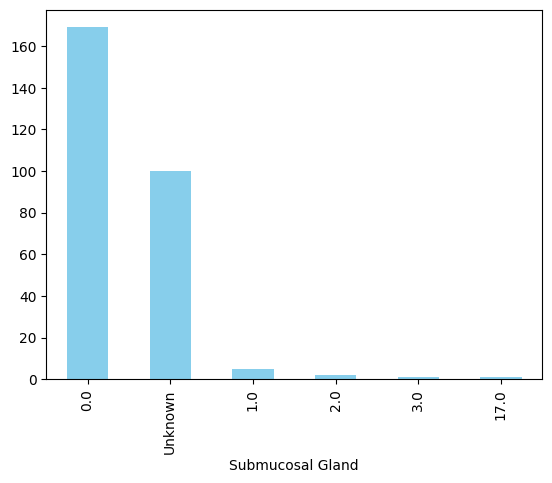

In [94]:
# Count the occurrences of each category
lol = samp_type['Submucosal Gland'].astype('category')
lol = lol.cat.add_categories('Unknown')
lol = lol.fillna('Unknown')

category_counts = lol.value_counts()

category_counts.plot(kind='bar', color='skyblue')
plt.show()

Most of it is 0's so we will remove that column. Also because our type annotation is very general,
we aren't getting very near to a limit of detection of our algorithm.
Though it would have to do with our uncertainty.

In [95]:
del samp_type['Submucosal Gland']

By the way the transfer of the labels is done, if the cluster is not present the label does not appear. So it would be like a 0.

In [96]:
samp_type = samp_type.fillna(0)
samp_type

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
sample,,,,,,,,,,
1247_Lambrechts_2018_LUAD_6149v1,2.0,70.0,31.0,11.0,0.0,122.0,1.0,105.0,0.0,1.0
BRONCHO_11_Kim_Lee_2020_LUAD,99.0,2.0,2.0,3.0,3.0,2222.0,0.0,733.0,0.0,78.0
BRONCHO_58_Kim_Lee_2020_LUAD,28.0,309.0,12.0,63.0,1.0,1693.0,0.0,509.0,11.0,70.0
BT1249_Lambrechts_2018_LUAD_6149v1,12.0,0.0,0.0,38.0,0.0,24.0,0.0,30.0,2.0,6.0
BT1290_Lambrechts_2018_LUAD_6149v2,67.0,284.0,158.0,184.0,5.0,1781.0,0.0,1090.0,20.0,169.0
...,...,...,...,...,...,...,...,...,...,...
scrBT1428_hg19_Lambrechts_2018_LUAD_6653,44.0,349.0,59.0,34.0,12.0,864.0,7.0,3655.0,0.0,67.0
scrBT1429m_Lambrechts_2018_LUAD_6653,26.0,204.0,446.0,86.0,36.0,583.0,3.0,521.0,4.0,24.0
scrBT1430m_Lambrechts_2018_LUAD_6653,9.0,43.0,4.0,8.0,0.0,1255.0,0.0,203.0,1.0,225.0


### Export for ARACNE AP

We export in a format that can be used for ARACNE AP, which has the 'genes' in the rows and only considers Target/TF pairs

In [97]:
aracne_types = samp_type.transpose()
aracne_types = pd.concat([aracne_types, aracne_types])
aracne_types.astype(int)
aracne_types.columns.name = None
aracne_types.index.name = 'genes'
aracne_types

,1247_Lambrechts_2018_LUAD_6149v1,BRONCHO_11_Kim_Lee_2020_LUAD,BRONCHO_58_Kim_Lee_2020_LUAD,BT1249_Lambrechts_2018_LUAD_6149v1,BT1290_Lambrechts_2018_LUAD_6149v2,BT1291_Lambrechts_2018_LUAD_6149v2,BT1292_Lambrechts_2018_LUAD_6149v2,BT1293_Lambrechts_2018_LUAD_6149v2,BT1294_Lambrechts_2018_LUAD_6149v2,BT1295_Lambrechts_2018_LUAD_6149v2,...,patient_50_normal_adjacent_Goveia_Carmeliet_2020_NSCLC,patient_50_tumor_primary_Goveia_Carmeliet_2020_NSCLC,scrBT1425_hg19_Lambrechts_2018_LUAD_6653,scrBT1426_hg19_Lambrechts_2018_LUAD_6653,scrBT1427_hg19_Lambrechts_2018_LUAD_6653,scrBT1428_hg19_Lambrechts_2018_LUAD_6653,scrBT1429m_Lambrechts_2018_LUAD_6653,scrBT1430m_Lambrechts_2018_LUAD_6653,scrBT1431m_Lambrechts_2018_LUAD_6653,scrBT1432m_Lambrechts_2018_LUAD_6653
genes,,,,,,,,,,,,,,,,,,,,,
Airway epithelium,2.0,99.0,28.0,12.0,67.0,68.0,144.0,74.0,11.0,192.0,...,3.0,74.0,29.0,47.0,65.0,44.0,26.0,9.0,3.0,2.0
Alveolar epithelium,70.0,2.0,309.0,0.0,284.0,262.0,313.0,379.0,223.0,15.0,...,51.0,253.0,64.0,100.0,68.0,349.0,204.0,43.0,38.0,5.0
Blood vessels,31.0,2.0,12.0,0.0,158.0,162.0,8.0,488.0,132.0,14.0,...,949.0,1246.0,53.0,59.0,33.0,59.0,446.0,4.0,29.0,5.0
Fibroblast lineage,11.0,3.0,63.0,38.0,184.0,198.0,23.0,132.0,59.0,13.0,...,9.0,41.0,34.0,32.0,33.0,34.0,86.0,8.0,9.0,7.0
Lymphatic EC,0.0,3.0,1.0,0.0,5.0,6.0,2.0,19.0,9.0,6.0,...,135.0,328.0,0.0,5.0,1.0,12.0,36.0,0.0,2.0,0.0
Lymphoid,122.0,2222.0,1693.0,24.0,1781.0,2019.0,1074.0,1888.0,1389.0,2370.0,...,241.0,181.0,983.0,1052.0,959.0,864.0,583.0,1255.0,2562.0,1000.0
Mesothelium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0
Myeloid,105.0,733.0,509.0,30.0,1090.0,629.0,867.0,1031.0,912.0,271.0,...,1565.0,655.0,1225.0,1566.0,1741.0,3655.0,521.0,203.0,217.0,48.0
Smooth muscle,0.0,0.0,11.0,2.0,20.0,19.0,2.0,8.0,2.0,2.0,...,0.0,7.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,0.0


In [98]:
tfs = aracne_types.index[0:10]

with open('tfs.txt', 'w') as f:
    for tf in tfs:
        f.write(str(tf) + '\n')

In [99]:
! cat tfs.txt

Airway epithelium
Alveolar epithelium
Blood vessels
Fibroblast lineage
Lymphatic EC
Lymphoid
Mesothelium
Myeloid
Smooth muscle
Unknown


In [100]:
aracne_types.to_csv('matrix.txt', sep='\t')

In [101]:
! head matrix.txt

genes	1247_Lambrechts_2018_LUAD_6149v1	BRONCHO_11_Kim_Lee_2020_LUAD	BRONCHO_58_Kim_Lee_2020_LUAD	BT1249_Lambrechts_2018_LUAD_6149v1	BT1290_Lambrechts_2018_LUAD_6149v2	BT1291_Lambrechts_2018_LUAD_6149v2	BT1292_Lambrechts_2018_LUAD_6149v2	BT1293_Lambrechts_2018_LUAD_6149v2	BT1294_Lambrechts_2018_LUAD_6149v2	BT1295_Lambrechts_2018_LUAD_6149v2	BT1296_Lambrechts_2018_LUAD_6149v2	BT1297_Lambrechts_2018_LUAD_6149v2	BT1298_Lambrechts_2018_LUAD_6149v2	BT1299_Lambrechts_2018_LUAD_6149v2	BT1300_Lambrechts_2018_LUAD_6149v2	BT1301_Lambrechts_2018_LUAD_6149v2	BT1375_Lambrechts_2018_LUAD_6653	BT1376_Lambrechts_2018_LUAD_6653	BT1377_Lambrechts_2018_LUAD_6653	BT1378_Lambrechts_2018_LUAD_6653	BT1A_Lambrechts_2018_LUAD_6149v1	BT1B_Lambrechts_2018_LUAD_6149v1	BT1C_Lambrechts_2018_LUAD_6149v1	BT2A_Lambrechts_2018_LUAD_6149v1	BT2B_Lambrechts_2018_LUAD_6149v1	EBUS_06_Kim_Lee_2020_LUAD	EBUS_10_Kim_Lee_2020_LUAD	EBUS_12_Kim_Lee_2020_LUAD	EBUS_13_Kim_Lee_2020_LUAD	EBUS_15_Kim_Lee_2020_LUAD	EBUS_19_Kim_Lee_2020_

We use [ARACNE-AP](https://github.com/califano-lab/ARACNe-AP/tree/master) because it is fast 
and we dont need many libraries. Just JAVA. Downlaod the git repo and change the path to that.

First we must calculate the threshold

In [2]:
! java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e matrix.txt  -o outputFolder \
    --tfs tfs.txt --pvalue 1E-8 --seed 1 --nobootstrap --nodpi \
    --calculateThreshold

Finding threshold for 278 samples
Parameters for fitted threshold function: [0.0910168539218434, 6.225412313320226E-6]
MI threshold: 0.1057896852797087


In [3]:
%%time
! java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e matrix.txt  -o outputFolder \
    --tfs tfs.txt --pvalue 1E-8 --seed 1 --nobootstrap --nodpi

MI threshold file is present
Calculate network from: matrix.txt
TFs processed: 10
Time elapsed for calculating MI: 0 sec

Edges removed by DPI:	0
Final Network size:	26
Total time elapsed: 0 sec
CPU times: user 3.59 ms, sys: 15 ms, total: 18.6 ms
Wall time: 346 ms


In [5]:
! sed '1d' outputFolder/nobootstrap_network.txt > net.txt

In [6]:
! cat outputFolder/net.txt

Lymphatic EC	Blood vessels	0.2548429933746341
Lymphatic EC	Myeloid	0.11402258433070411
Lymphoid	Alveolar epithelium	0.11453408820865096
Lymphoid	Myeloid	0.17747374716515907
Unknown	Alveolar epithelium	0.13703129801696612
Unknown	Airway epithelium	0.22518308293431488
Alveolar epithelium	Lymphoid	0.11453408820865185
Alveolar epithelium	Unknown	0.13703129801696612
Alveolar epithelium	Airway epithelium	0.11947828749822431
Alveolar epithelium	Myeloid	0.12418377909800515
Blood vessels	Lymphatic EC	0.28237782131520817
Blood vessels	Smooth muscle	0.23642517864264434
Blood vessels	Myeloid	0.15445297658550228
Blood vessels	Fibroblast lineage	0.3202744047026558
Smooth muscle	Blood vessels	0.2081188843891475
Smooth muscle	Fibroblast lineage	0.27089770491462417
Airway epithelium	Unknown	0.23103608471959003
Myeloid	Lymphatic EC	0.1125293287963105
Myeloid	Lymphoid	0.17747374716515907
Myeloid	Alveolar epithelium	0.12418377909800515
Myeloid	Blood vessels	0.17572637686214776
Fibroblast lineage	Blood ves

## Paint network

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

In [8]:
G = nx.read_edgelist("outputFolder/net.txt", data=(("MI", str),), delimiter='\t')
list(G.edges(data=True))

[('Lymphatic EC', 'Blood vessels', {'MI': '0.28237782131520817'}),
 ('Lymphatic EC', 'Myeloid', {'MI': '0.1125293287963105'}),
 ('Blood vessels', 'Smooth muscle', {'MI': '0.2081188843891475'}),
 ('Blood vessels', 'Myeloid', {'MI': '0.17572637686214776'}),
 ('Blood vessels', 'Fibroblast lineage', {'MI': '0.29667128232006323'}),
 ('Myeloid', 'Lymphoid', {'MI': '0.17747374716515907'}),
 ('Myeloid', 'Alveolar epithelium', {'MI': '0.12418377909800515'}),
 ('Lymphoid', 'Alveolar epithelium', {'MI': '0.11453408820865185'}),
 ('Alveolar epithelium', 'Unknown', {'MI': '0.13703129801696612'}),
 ('Alveolar epithelium', 'Airway epithelium', {'MI': '0.11947828749822431'}),
 ('Unknown', 'Airway epithelium', {'MI': '0.23103608471959003'}),
 ('Smooth muscle', 'Fibroblast lineage', {'MI': '0.26457154237473635'})]

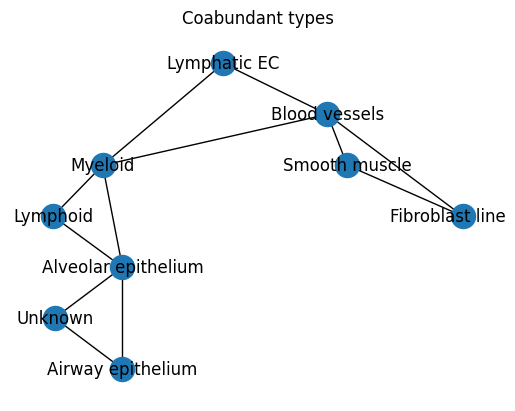

In [9]:
plt.title('Coabundant types')
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True)
plt.savefig('coabundant_types.png')

Maybe we can do also mututal information of samples and see if clusters correlate with cancer or tissue type

### MI with sklearn (deprecated)

In [84]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

We won't use the function `mutual_info_score` because it is for labels assigned to a same observation. Which is not the case 
here because we are counting ocurrence of cells and no two cells should have more than one type.

So we use the `mutual_info_classif` though it is pretty unstable and does not use the same method than ARACNE.

**TODO:** compare the two methods, apparently n_neighbours is better at handling missing values?!?!?

To use discrete values we will rank the cell type in every sample based on a normalization by its total number of cells.

In [174]:
cells_x_sample = samp_type.transpose().sum().to_numpy()
percents = (samp_type / cells_x_sample.reshape(-1,1))*10
percents = percents.astype(int)
percents

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
sample,,,,,,,,,,
1247_Lambrechts,0,2,0,0,0,3,0,3,0,0
BRONCHO_11_Kim,0,0,0,0,0,7,0,2,0,0
BRONCHO_58_Kim,0,1,0,0,0,6,0,1,0,0
BT1249_Lambrechts,1,0,0,3,0,2,0,2,0,0
BT1A_Lambrechts,1,0,0,0,0,5,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
patient_45_tumor_primary_Goveia,0,0,4,0,0,0,0,0,0,2
patient_46_normal_adjacent_Goveia,0,0,1,0,0,0,0,6,0,0
patient_46_tumor_primary_Goveia,1,1,2,0,0,0,0,0,0,2


Lets try with 10 ranks first. We should maybe look at the histogram to define the ranks but later.

In [167]:
percents.quantile([0.25,0.5,0.75])

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
0.25,0.555112,0.095459,0.080835,0.090000,0.000000,12.106691,0.0,12.803444,0.000000,1.073977
0.50,2.155407,1.019274,0.441795,0.530837,0.000000,35.717875,0.0,25.158388,0.049634,3.158462
0.75,11.011905,4.148505,1.565885,2.462523,0.107153,60.486871,0.0,44.321183,0.238419,9.326886


In [180]:
mis = []

for col in percents.columns:
    
    mis.append(mutual_info_classif(percents.to_numpy(),percents[col].to_numpy().reshape(-1,1)))
    
pd.DataFrame(mis, columns=percents.columns, index = percents.columns)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
Level_2_transfered_label,,,,,,,,,,
Airway epithelium,1.054760e+00,5.498831e-01,3.326694e-01,4.077500e-01,1.264831e-01,1.390151e-01,4.939621e-01,4.922736e-02,4.321303e-01,0.000000e+00
Alveolar epithelium,0.000000e+00,6.438520e-01,2.373198e-01,2.415227e-01,4.240108e-02,6.390419e-02,3.454416e-01,7.780823e-02,2.860061e-01,2.874398e-02
Blood vessels,1.268936e-02,2.330745e-01,3.365842e-01,3.073920e-01,2.537583e-01,2.804300e-02,2.768843e-01,0.000000e+00,3.217768e-01,0.000000e+00
Fibroblast lineage,2.326619e-03,5.747926e-02,1.472116e-01,3.696483e-01,1.481677e-01,2.477861e-03,2.179479e-01,1.900580e-03,2.129614e-01,1.731524e-02
Lymphatic EC,0.000000e+00,0.000000e+00,8.131330e-03,0.000000e+00,4.811499e-02,0.000000e+00,3.892864e-02,0.000000e+00,4.155331e-02,2.374098e-03
Lymphoid,1.483189e-01,9.485741e-02,6.735740e-02,0.000000e+00,1.098557e-01,1.333505e+00,6.050899e-02,4.374144e-01,3.717078e-02,1.221909e-01
Mesothelium,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
Myeloid,1.562561e-02,2.437624e-01,2.578793e-02,1.247594e-01,9.637084e-02,3.219901e-01,0.000000e+00,1.492556e+00,8.698299e-02,1.098791e-01
Smooth muscle,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16


tener las unidades en bits te sirve para comparar que tantos bits pueden compartir dos cosas

This binning is not as efficient as the one from ARACNE because the Gaussina copula method considers variance also, besides the static width. So we will use the method from ARACNE and in that way, we also wont have to normalize for ourselves.